# Employee Attrition Analysis
This notebook explores factors influencing employee 
attrition using IBM HR dataset.

## Setups and import


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: make plots look nicer 
sns.set(style="whitegrid")

### Load the dataset

In [2]:
# Read the dataset
df = pd.read_csv('employee_attrition_ibm_hr.csv')

# Display the first 5 rows and show number of columns
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


###  Understanding the datset

In [ ]:
# Check column names and data types
df.info()

In [4]:
# Check for missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
# Get summary statistics for numerical columns
df.describe().round(2)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.0,1470.00,1470.00,1470.00,1470.00,1470.00,...,1470.00,1470.0,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.0,1024.87,2.72,65.89,2.73,2.06,...,2.71,80.0,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.0,602.02,1.09,20.33,0.71,1.11,...,1.08,0.0,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.0,1.00,1.00,30.00,1.00,1.00,...,1.00,80.0,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.0,491.25,2.00,48.00,2.00,1.00,...,2.00,80.0,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.0,1020.50,3.00,66.00,3.00,2.00,...,3.00,80.0,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.0,1555.75,4.00,83.75,3.00,3.00,...,4.00,80.0,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.0,2068.00,4.00,100.00,4.00,5.00,...,4.00,80.0,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


attrition

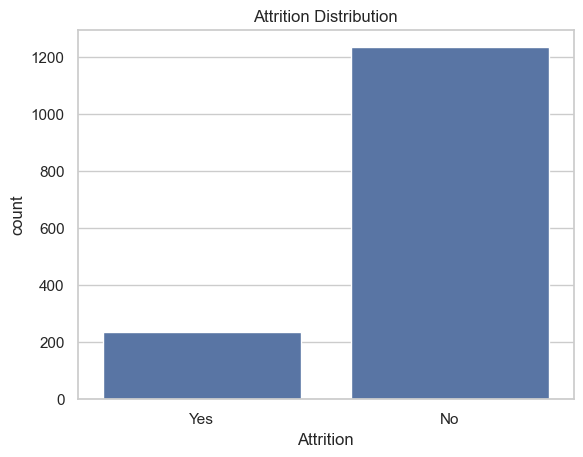

In [3]:
# Attrition count plot
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Distribution')
plt.show()


# Employee Attrition Analysis
This notebook explores factors influencing employee 
attrition using IBM HR dataset.

Attrition by Department


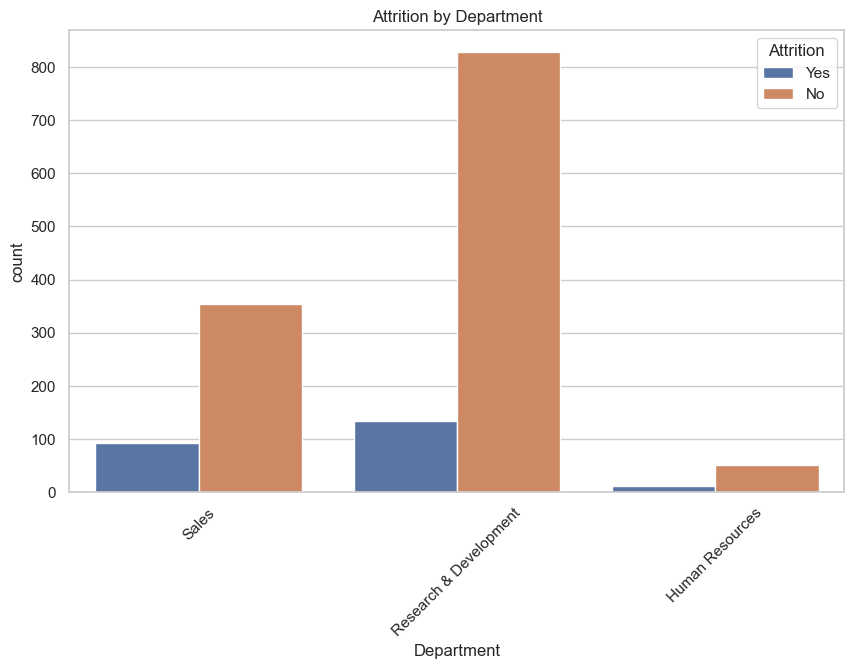

In [9]:
# Attrition by department
plt.figure(figsize=(10,6))
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title('Attrition by Department')
plt.xticks(rotation=45)
plt.show()


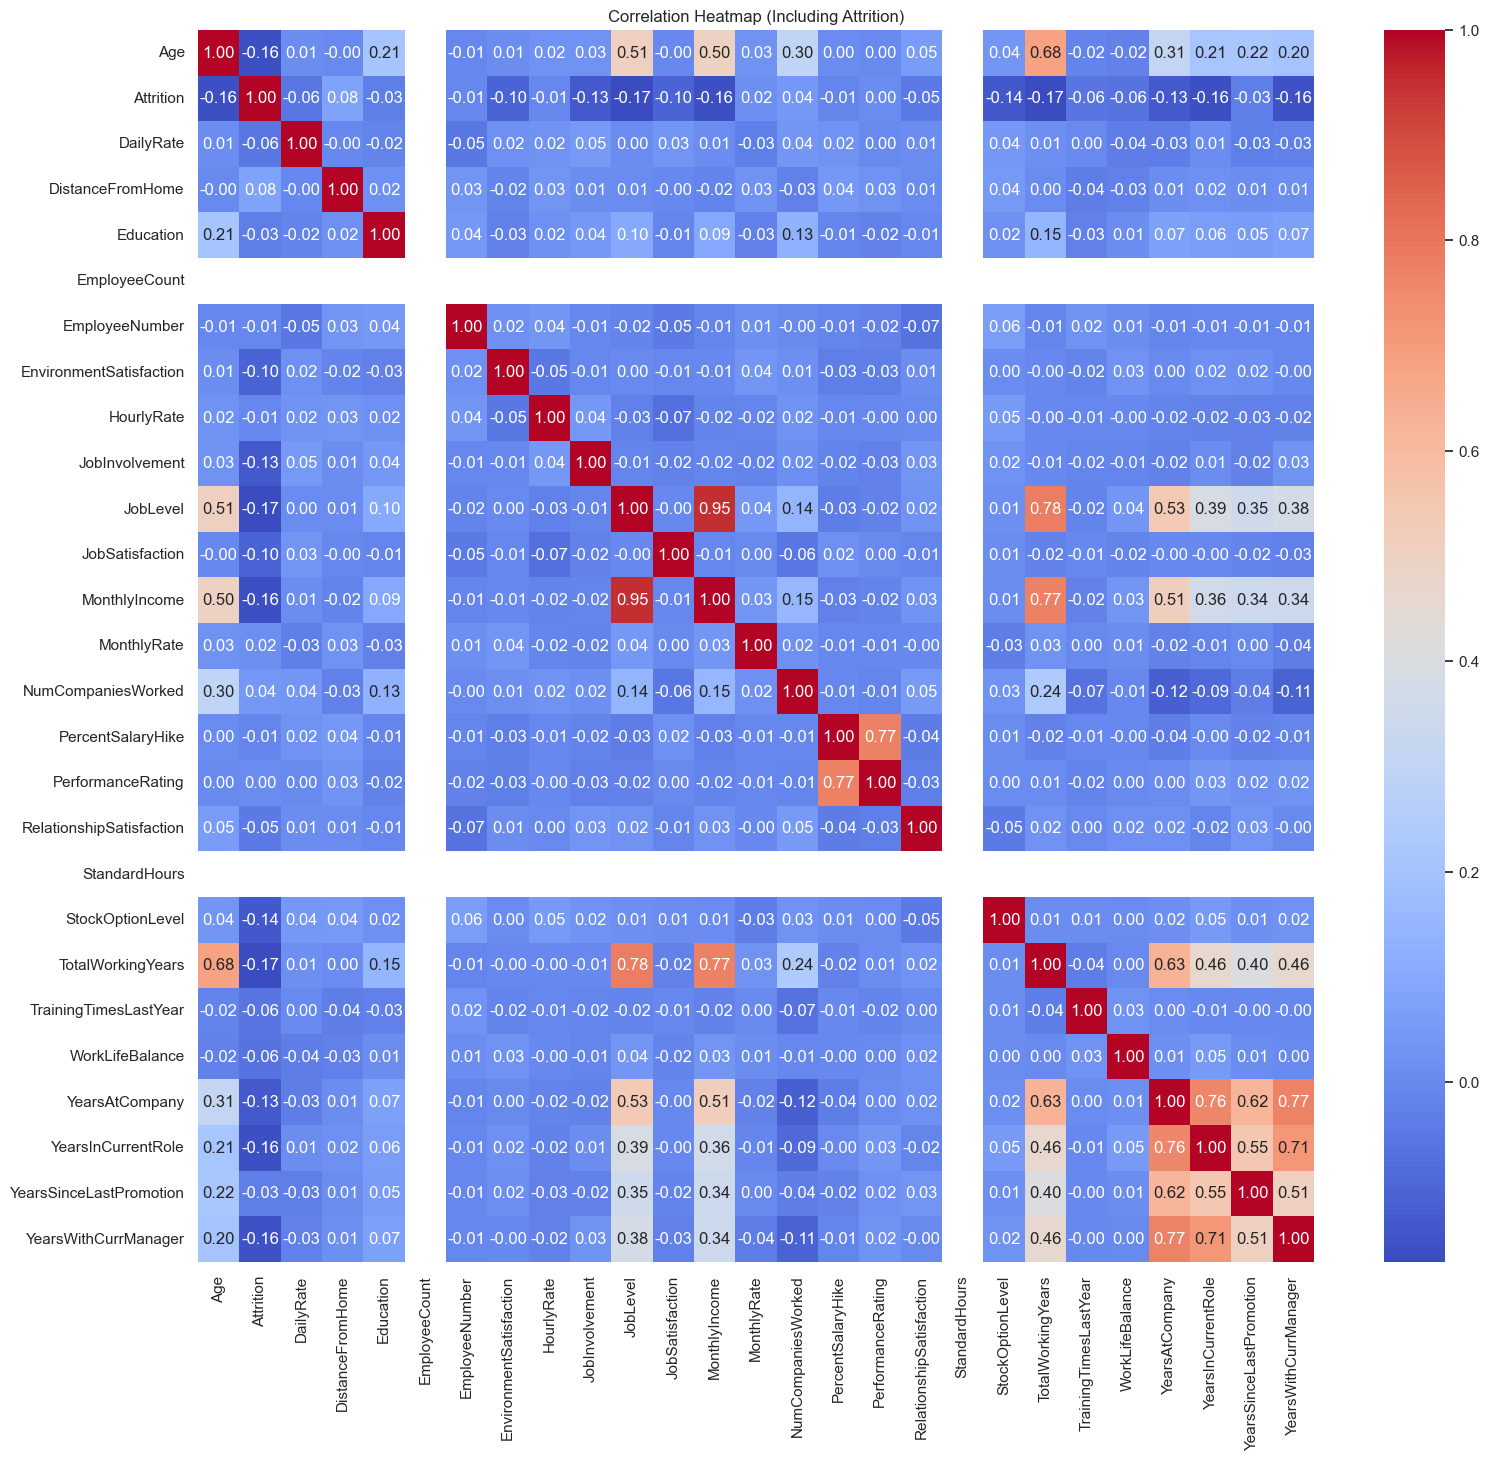

In [5]:
# Copy the dataframe to avoid altering the original
df_encoded = df.copy()

# Convert Attrition from Yes/No to 1/0
df_encoded['Attrition'] = df_encoded['Attrition'].map({'Yes': 1, 'No': 0})

# Select numeric columns
numeric_df = df_encoded.select_dtypes(include='number')

# Plot correlation heatmap
plt.figure(figsize=(18,16))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Including Attrition)')
plt.show()


Correleation Heatmap notes

Attrition is slightly negatively correleated to age (-0.16)

Attrition is slightly negatively correleated to Environment Satisfaction (-0.10)

Attrition is slightly negatively correlated to Job Level (-0.17)

Attrition is slightly negatively correlated to Monthly Income (-0.16)

Attrition is slightly negatively correlated to Stock option level (-0.14)

Attrition is slightly negatively correlated to Years in current role (-0.16)

Attrition is slightly negatively correlated to Years With Current Manager (-0.16)

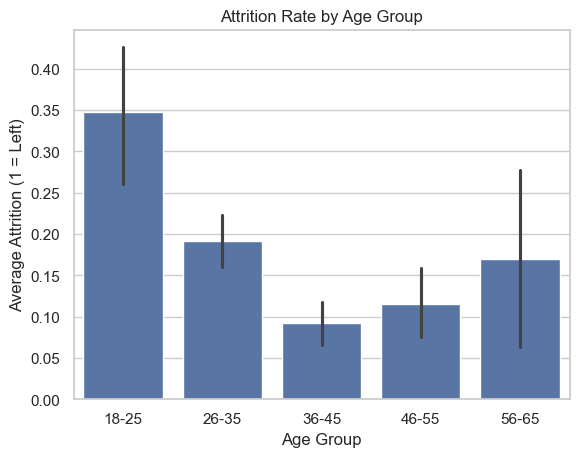

In [6]:
# Create age groups
df_encoded['AgeGroup'] = pd.cut(df_encoded['Age'], bins=[18,25,35,45,55,65], 
                                labels=['18-25','26-35','36-45','46-55','56-65'])

# Bar plot
sns.barplot(x='AgeGroup', y='Attrition', data=df_encoded)
plt.title('Attrition Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Attrition (1 = Left)')
plt.show()


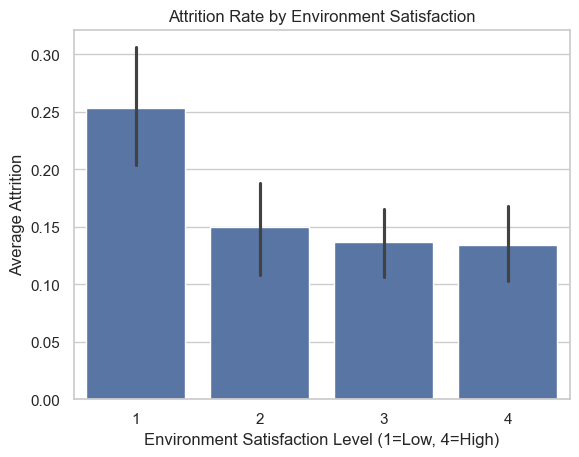

In [7]:
sns.barplot(x='EnvironmentSatisfaction', y='Attrition', data=df_encoded)
plt.title('Attrition Rate by Environment Satisfaction')
plt.xlabel('Environment Satisfaction Level (1=Low, 4=High)')
plt.ylabel('Average Attrition')
plt.show()


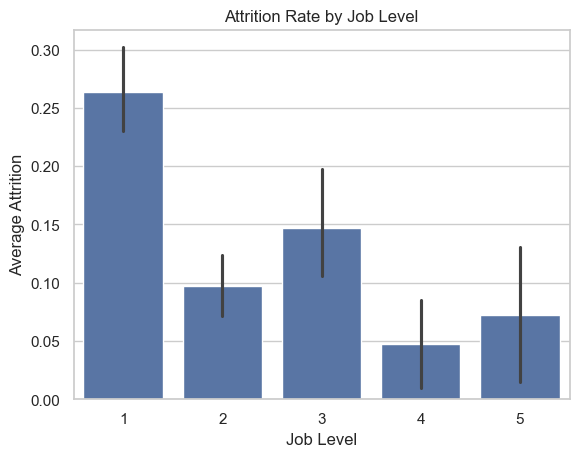

In [8]:
sns.barplot(x='JobLevel', y='Attrition', data=df_encoded)
plt.title('Attrition Rate by Job Level')
plt.xlabel('Job Level')
plt.ylabel('Average Attrition')
plt.show()


In [ ]:
print(df.dtypes)


 ###    Identify numeric columns that might be categorical

In [ ]:
# Select numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Print number of unique values per numeric column
for col in numeric_cols:
    unique_vals = df[col].nunique()
    print(f"{col}: {unique_vals} unique values")

# Identify likely categorical numeric columns (few unique values)
categorical_numeric = [col for col in numeric_cols if df[col].nunique() < 10]
print("\nLikely categorical numeric columns:", categorical_numeric)

 ###    Map categorical numeric columns

In [ ]:
# Define mappings
education_map = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
satisfaction_map = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
worklife_map = {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}
performance_map = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}

# Apply mappings
df['Education'] = df['Education'].map(education_map)
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].map(satisfaction_map)
df['JobInvolvement'] = df['JobInvolvement'].map(satisfaction_map)
df['JobSatisfaction'] = df['JobSatisfaction'].map(satisfaction_map)
df['WorkLifeBalance'] = df['WorkLifeBalance'].map(worklife_map)
df['PerformanceRating'] = df['PerformanceRating'].map(performance_map)

# Verify mappings
df[['Education', 'JobSatisfaction', 'WorkLifeBalance', 'PerformanceRating']].head()


###     Employee attrition analysis

In [ ]:
# Count employees who left vs stayed
attrition_counts = df['Attrition'].value_counts()
print("Attrition counts:\n", attrition_counts)

# Plot attrition distribution
sns.countplot(x='Attrition', data=df)
plt.title('Employee Attrition Distribution')
plt.show()


###     Export cleaned data to Tableu

In [33]:
df.to_csv('employee_attrition_cleaned.csv', index=False)
